In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df_ASIC=pd.read_csv('logs/lc-ASIC_Run6_5minute_200nA_26May_034729.csv')
df_em=pd.read_csv('logs/lc-emulator_Run6_5minute_200nA_26May_034729.csv')

emVals=np.vectorize(int)(df_em.values[256:],16)[:,2:-1]
asicVals=np.vectorize(int)(df_ASIC.values[256:],16)[:,2:-1]
asicVals_shifted=np.zeros_like(asicVals,dtype=int)

nshift=8
for j in range(10):
    x=np.vectorize(lambda x: f'{x:032b}')(asicVals)
    y=''.join(list(x[:,j][::-1]))[nshift:]+'0'*nshift
    asicVals_shifted[:,j]=[int(y[i:i+32],2) for i in range(0,len(y),32)][::-1]
    
asicVals=asicVals[[i for i in range(len(asicVals)) if not (i%128==0)]]
asicVals_shifted=asicVals_shifted[[i for i in range(len(asicVals_shifted)) if not (i%128==0)]]
emVals=emVals[[i for i in range(len(emVals)) if not (i%128==0)]]

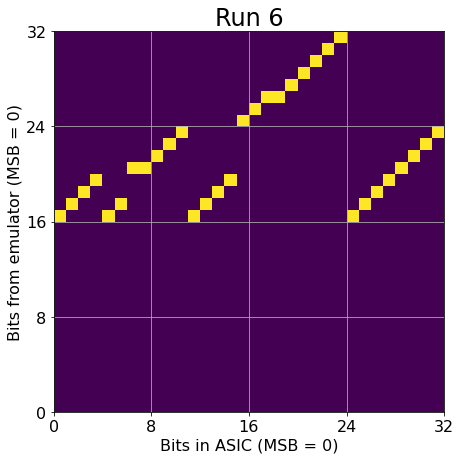

In [3]:
r_x=[]
r_y=[]
for i in range(32):
    _x=(asicVals_shifted>>(31-i))&1
    for j in range(32):
        if (_x==((emVals>>(31-j))&1)).all():
#             print(i,j)
            r_x.append(i)
            r_y.append(j)
f=plt.figure(figsize=(7,7))
plt.hist2d(r_x,r_y,bins=np.linspace(0,32,33));
plt.xticks([0,8,16,24,32],fontsize=16)
plt.yticks([0,8,16,24,32],fontsize=16)
plt.grid()
plt.xlabel('Bits in ASIC (MSB = 0)',fontsize=16)
plt.ylabel('Bits from emulator (MSB = 0)',fontsize=16)
plt.title('Run 6',fontsize=24);

In [4]:
df_ASIC=pd.read_csv('logs/lc-ASIC_Run9_5min_200nA_01Jan_002820.csv')
df_em=pd.read_csv('logs/lc-emulator_Run9_5min_200nA_01Jan_002820.csv')
emVals=np.vectorize(int)(df_em.values[3776:],16)[:,2:-1]
asicVals=np.vectorize(int)(df_ASIC.values[3776:],16)[:,2:-1]
asicVals_shifted=np.zeros_like(asicVals,dtype=int)

nshift=2
for j in range(10):
    x=np.vectorize(lambda x: f'{x:032b}')(asicVals)
    y='0'*nshift+''.join(list(x[:,j][::-1]))[:-1*nshift] ##shift LSB to the previous BX
#     y=''.join(list(x[:,j][::-1]))[nshift:]+'0'*nshift ##shift MSB to the next BX
    asicVals_shifted[:,j]=[int(y[i:i+32],2) for i in range(0,len(y),32)][::-1]
    
asicVals=asicVals[[i for i in range(len(asicVals)) if not ((i%63)==63)]][:-1]
asicVals_shifted=asicVals_shifted[[i for i in range(len(asicVals_shifted)) if not ((i%63)==63)]][:-1]
emVals=emVals[[i for i in range(len(emVals)) if not ((i%63)==63)]][:-1]

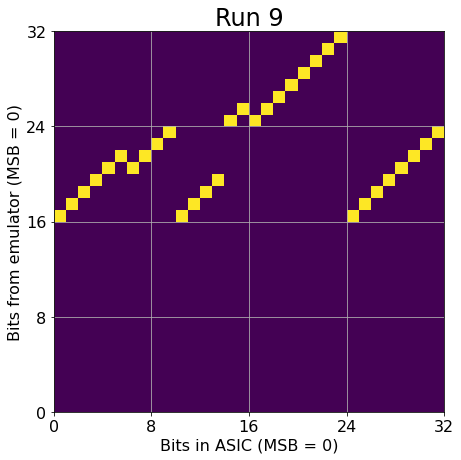

In [5]:
r_x=[]
r_y=[]
for i in range(32):
    _x=(asicVals_shifted>>(31-i))&1
    for j in range(32):
        if (_x==((emVals>>(31-j))&1)).sum()>(asicVals.flatten().shape[0]*.99):
#         if (_x==((emVals>>(31-j))&1)).all():
#             print(i,j)
            r_x.append(i)
            r_y.append(j)

f=plt.figure(figsize=(7,7))
plt.hist2d(r_x,r_y,bins=np.linspace(0,32,33))
plt.xticks([0,8,16,24,32],fontsize=16)
plt.yticks([0,8,16,24,32],fontsize=16)
plt.grid()
plt.xlabel('Bits in ASIC (MSB = 0)',fontsize=16)
plt.ylabel('Bits from emulator (MSB = 0)',fontsize=16);
plt.title('Run 9',fontsize=24);